In [1]:
!pip install mxnet-cu100mkl

     |████████████████████████████████| 576.6MB 21kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

ctx = mx.gpu()

## Getting our dataset

In [0]:
def transform(data):
    return data.reshape((784)).astype('float32')/255.0

train_mnist = gluon.data.vision.MNIST(train = True).transform_first(transform)

##Reviewing the dataset

In [3]:
image, label = train_mnist[1]
print(image.shape)
print(label)

(784,)
0


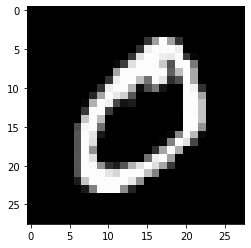

In [4]:
plt.imshow(image.reshape((28, 28)).asnumpy(), 'gray')
plt.show()

##Creating data loader for training

In [0]:
batch_size = 64
training_data = gluon.data.DataLoader(train_mnist, batch_size = batch_size, shuffle = True)

##Building the GAN model

In conditional gan we combine features and labels as one input, and then feed these combined inputs to discriminator to discriminate em as true(if the combined input contains features from true data) or false(if the combined input contains data generated by the generator), also the generator generates false data from a random noise distribution combined with labels
and hence making the generator conditional, that is, generator will generate data based on our desired output category, unlike vanilla gan, whose generated data just depends on the random noise that we feed in

In [0]:
# ===================== Discriminator Parameters ===========================
# so the way of combining features and labels is by "concatenation"
# which is just sort of a synonym of "appending"
# so featues has shape: (-1, 784) = (dimension 1, dimension 2)
# and labels has shape: (-1, 10) = (dimension 1, dimension 2)
# therefore after concatenation for 1st dimension, the output shape will be: (-1, 784 + 10)
# so we need to initialize our parameters accordingly

dw1 = nd.random.normal(0, 1, (784 + 10, 128), ctx = ctx) * 0.001
db1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

dw2 = nd.random.normal(0, 1, (128, 1), ctx = ctx) * 0.001
db2 = nd.random.normal(0, 1, 1, ctx = ctx) * 0.001
# ==========================================================================

# ======================= Generator Parameters =============================
gw1 = nd.random.normal(0, 1, (100 + 10, 128), ctx = ctx) * 0.001
gb1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

gw2 = nd.random.normal(0, 1, (128, 784), ctx = ctx) * 0.001
gb2 = nd.random.normal(0, 1, 784, ctx = ctx) * 0.001
# ==========================================================================

def discriminator(x, y):
    inputs = nd.concat(x, y, dim = 1) # here we are doing concatenation of features and labels with dimension 1
    layer1 = nd.relu(nd.dot(inputs, dw1) + db1)
    predicted = nd.sigmoid(nd.dot(layer1, dw2) + db2)
    return predicted

def generator(z, y):
    inputs = nd.concat(z, y, dim = 1) # here we are doing concatenation of noise and labels with dimension 1
    layer1 = nd.relu(nd.dot(inputs, gw1) + gb1)
    generated = nd.sigmoid(nd.dot(layer1, gw2) + gb2)
    return generated

dparams = [dw1, db1, dw2, db2]
gparams = [gw1, gb1, gw2, gb2]

# as this is an scratch implementation, so we are gonna implement the optimizer from scratch too

dsqrs = [] # for adam optimizer
dvs = [] # for adam optimizer

gsqrs = [] # for adam optimizer
gvs = [] # for adam optimizer

for param in dparams:
    param.attach_grad()
    dsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    dvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    
for param in gparams:
    param.attach_grad()
    gsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    gvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability

## Defining loss functions

In [0]:
def dloss(true, false):
    return -nd.mean(nd.log(true) + nd.log(1 - false))

def gloss(false):
    return -nd.mean(nd.log(false))

## Defining optimizer

In [0]:
def adam(t, params, vs, sqrs, lr = 0.001):
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8

    for param, v, sqr in zip(params, vs, sqrs):
        grad = param.grad / batch_size

        v[:] = beta1 * v + (1. - beta1) * grad
        sqr[:] = beta2 * sqr + (1. - beta2) * nd.square(grad + 1e-8)

        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)

        update = lr * v_bias_corr / (nd.sqrt(sqr_bias_corr + 1e-8) + eps)
        param[:] = param - update

##Training the model

Epoch: 0 | Generator Loss: 2.32973 | Discirminator Loss: 0.81174


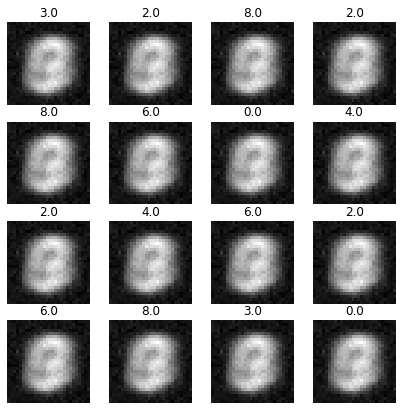

Epoch: 1 | Generator Loss: 5.87627 | Discirminator Loss: 0.01963


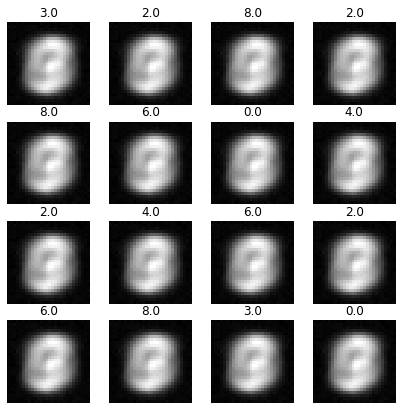

Epoch: 2 | Generator Loss: 3.90555 | Discirminator Loss: 0.22751


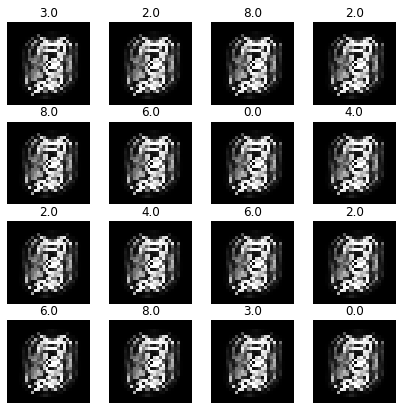

Epoch: 3 | Generator Loss: 3.79685 | Discirminator Loss: 0.25330


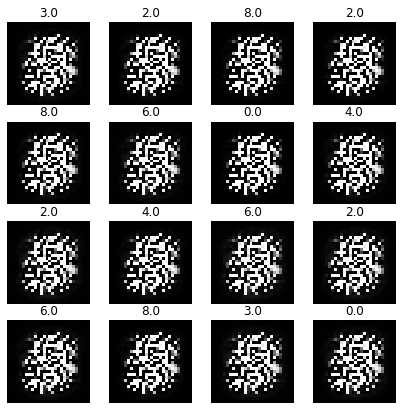

Epoch: 4 | Generator Loss: 4.93472 | Discirminator Loss: 0.04280


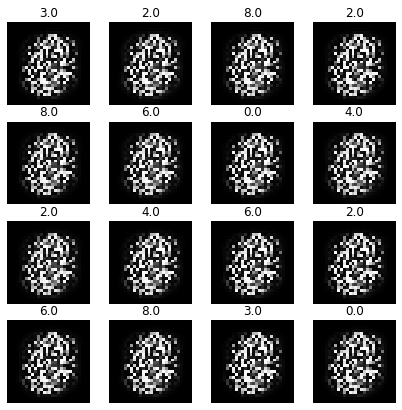

Epoch: 5 | Generator Loss: 3.43281 | Discirminator Loss: 0.26915


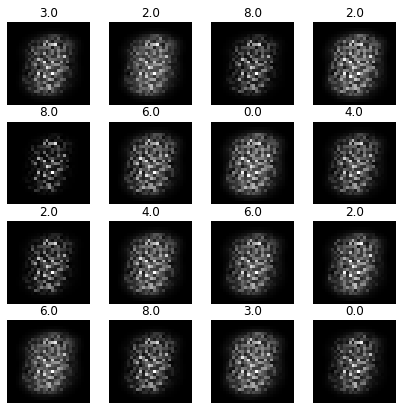

Epoch: 6 | Generator Loss: 3.29005 | Discirminator Loss: 0.24207


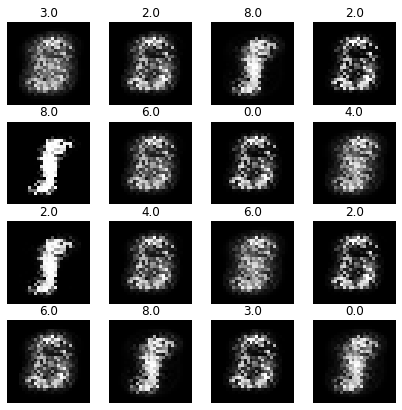

Epoch: 7 | Generator Loss: 3.86929 | Discirminator Loss: 0.17985


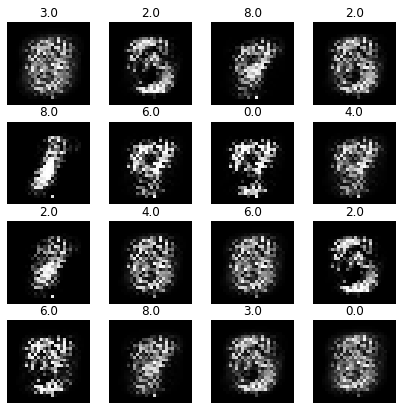

Epoch: 8 | Generator Loss: 4.40931 | Discirminator Loss: 0.22865


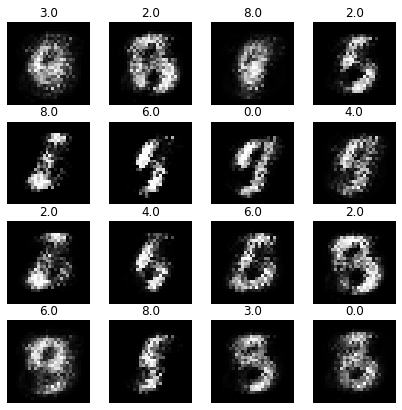

Epoch: 9 | Generator Loss: 4.15280 | Discirminator Loss: 0.30165


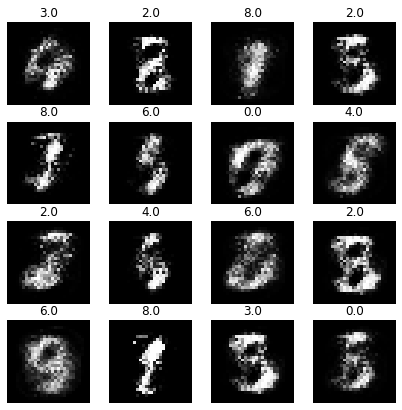

Epoch: 10 | Generator Loss: 3.83050 | Discirminator Loss: 0.44797


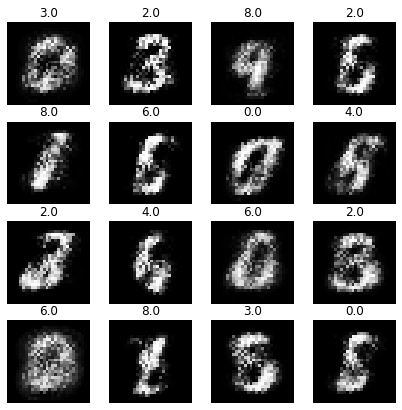

Epoch: 11 | Generator Loss: 3.80948 | Discirminator Loss: 0.54520


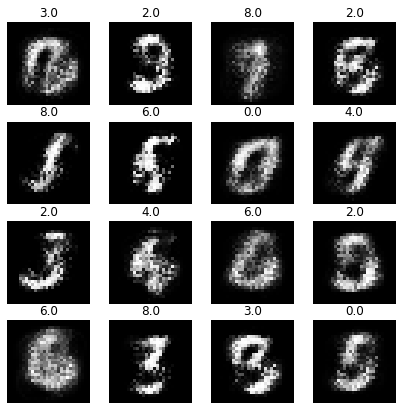

Epoch: 12 | Generator Loss: 3.38967 | Discirminator Loss: 0.65384


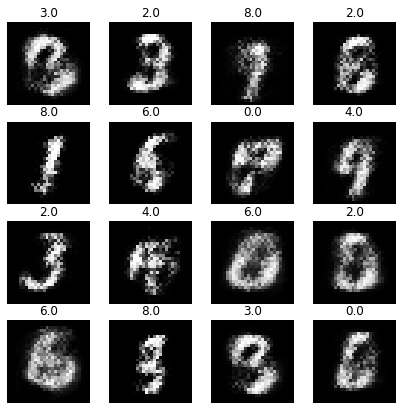

Epoch: 13 | Generator Loss: 3.25064 | Discirminator Loss: 0.78434


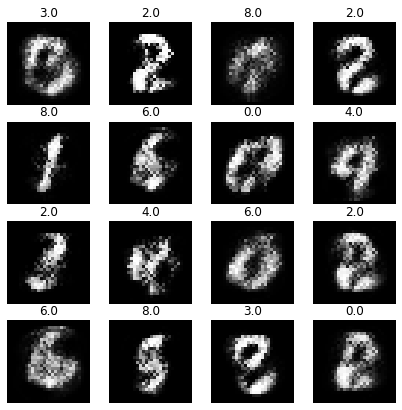

Epoch: 14 | Generator Loss: 3.26548 | Discirminator Loss: 0.75194


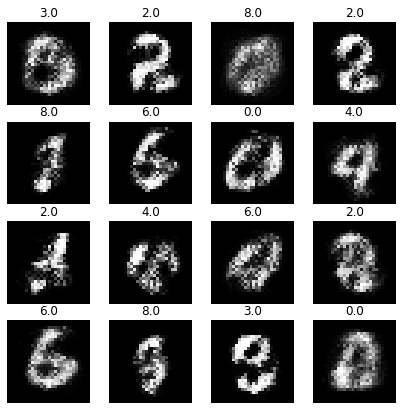

Epoch: 15 | Generator Loss: 2.85883 | Discirminator Loss: 0.88078


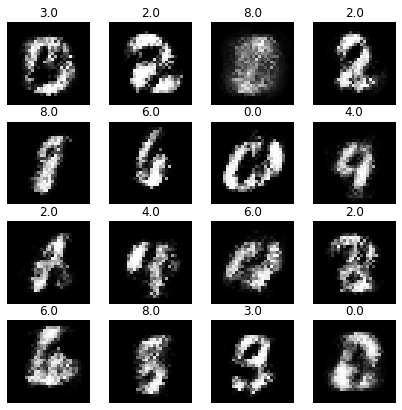

Epoch: 16 | Generator Loss: 2.69852 | Discirminator Loss: 0.90315


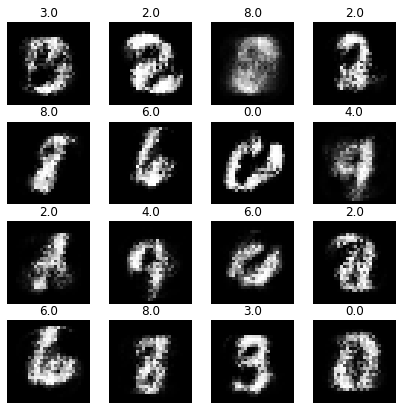

Epoch: 17 | Generator Loss: 2.54711 | Discirminator Loss: 0.88514


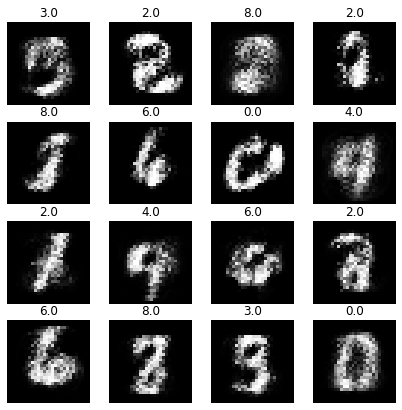

Epoch: 18 | Generator Loss: 2.71775 | Discirminator Loss: 0.78900


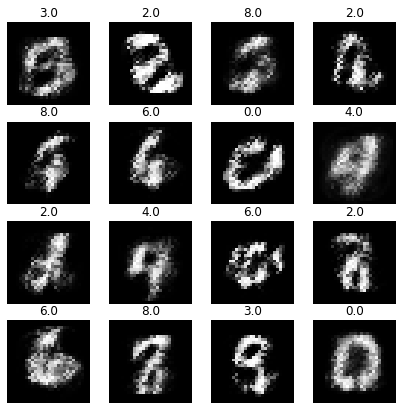

Epoch: 19 | Generator Loss: 2.57327 | Discirminator Loss: 0.93446


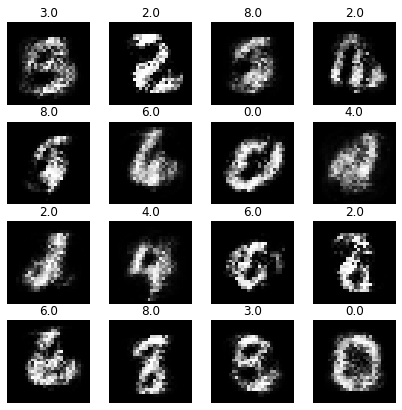

Epoch: 20 | Generator Loss: 2.73029 | Discirminator Loss: 0.92451


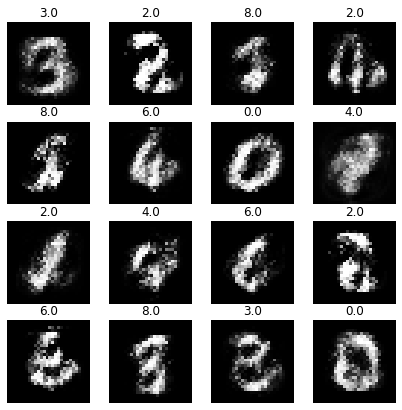

Epoch: 21 | Generator Loss: 2.53521 | Discirminator Loss: 0.95047


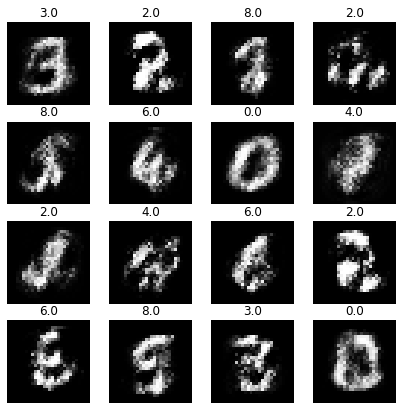

Epoch: 22 | Generator Loss: 2.43475 | Discirminator Loss: 0.96930


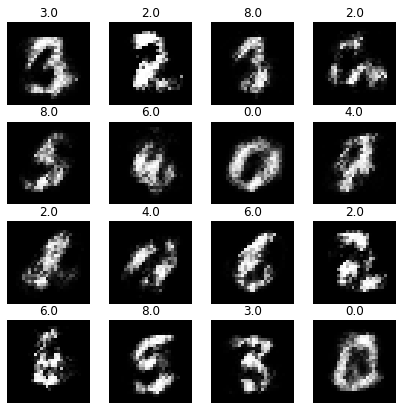

Epoch: 23 | Generator Loss: 2.24384 | Discirminator Loss: 0.95583


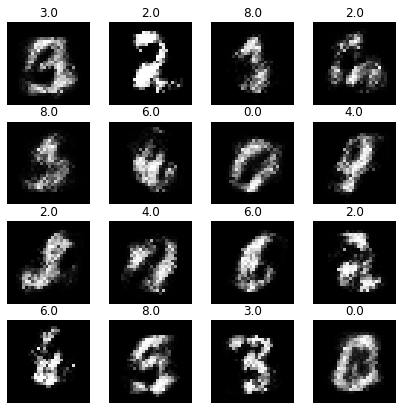

Epoch: 24 | Generator Loss: 2.20303 | Discirminator Loss: 0.93894


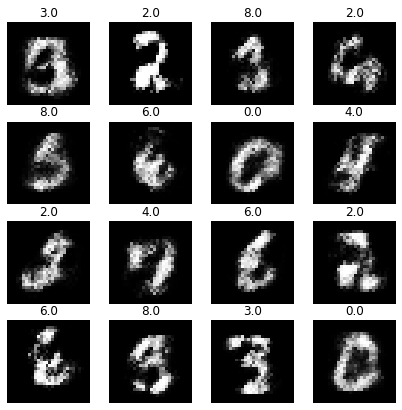

Epoch: 25 | Generator Loss: 2.12474 | Discirminator Loss: 0.94837


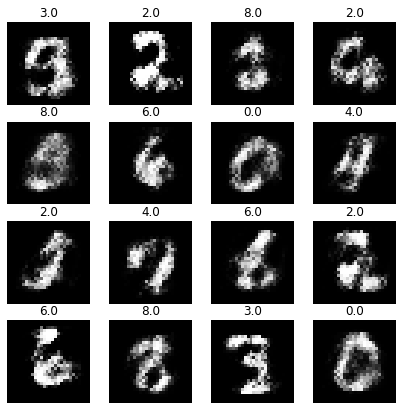

Epoch: 26 | Generator Loss: 2.09650 | Discirminator Loss: 0.95107


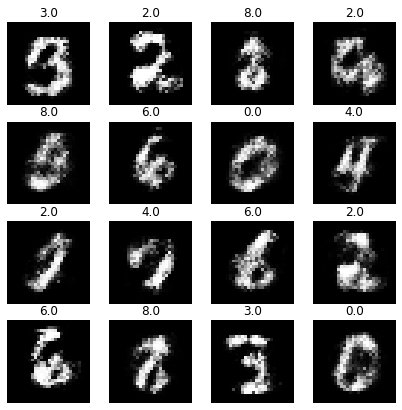

Epoch: 27 | Generator Loss: 2.05161 | Discirminator Loss: 1.02689


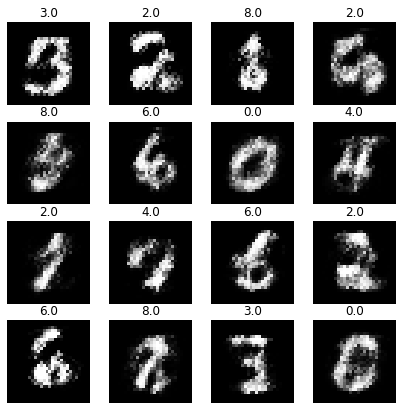

Epoch: 28 | Generator Loss: 2.01342 | Discirminator Loss: 1.01163


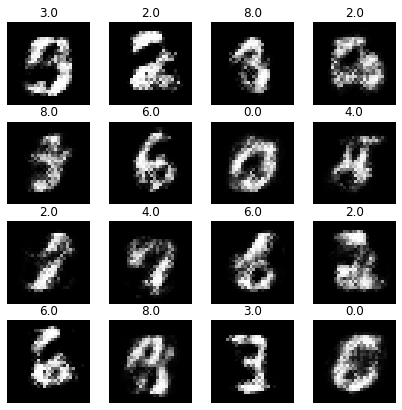

Epoch: 29 | Generator Loss: 1.85109 | Discirminator Loss: 1.01610


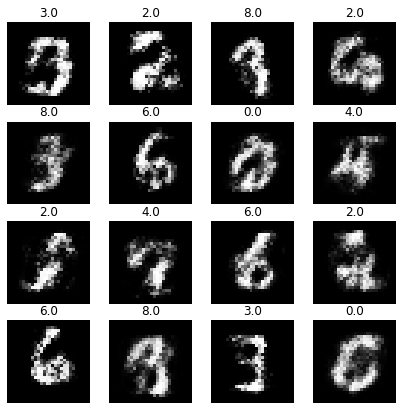

Epoch: 30 | Generator Loss: 1.80470 | Discirminator Loss: 1.01085


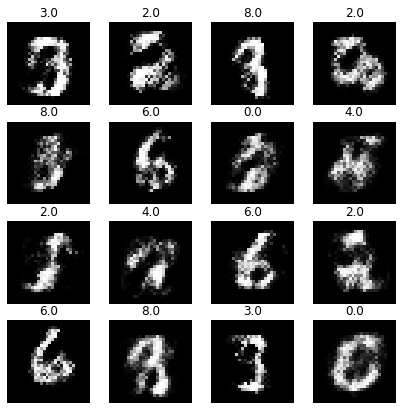

Epoch: 31 | Generator Loss: 1.99023 | Discirminator Loss: 0.98483


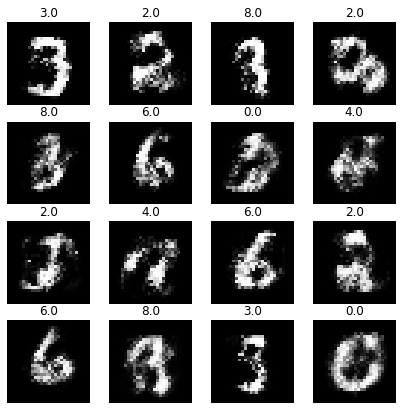

Epoch: 32 | Generator Loss: 1.89736 | Discirminator Loss: 0.96470


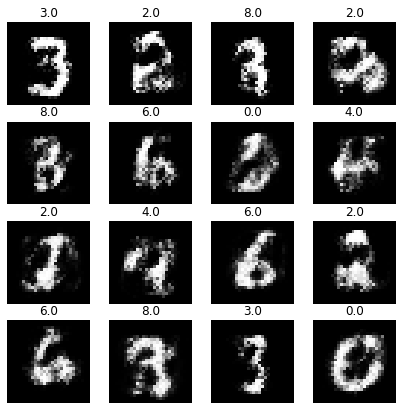

Epoch: 33 | Generator Loss: 1.82302 | Discirminator Loss: 0.98063


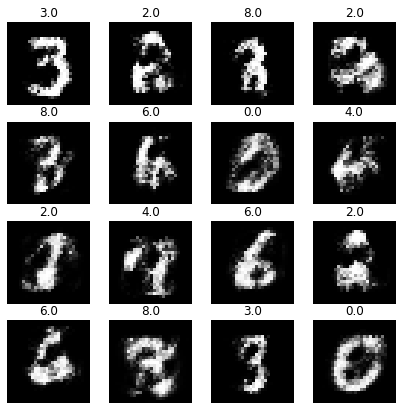

Epoch: 34 | Generator Loss: 1.79574 | Discirminator Loss: 0.95909


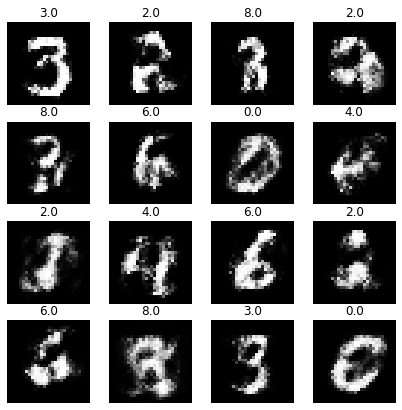

Epoch: 35 | Generator Loss: 1.72918 | Discirminator Loss: 0.96141


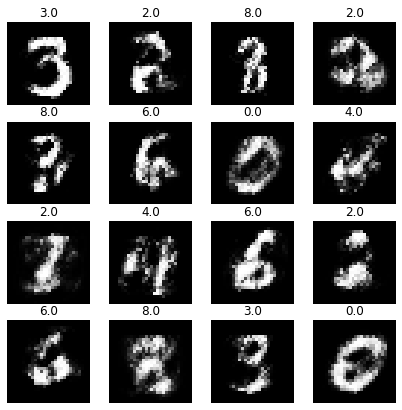

Epoch: 36 | Generator Loss: 1.72889 | Discirminator Loss: 0.95856


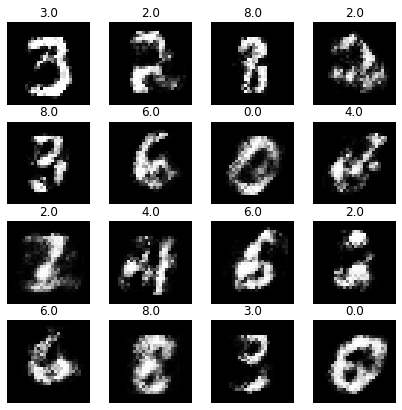

Epoch: 37 | Generator Loss: 1.67120 | Discirminator Loss: 0.98782


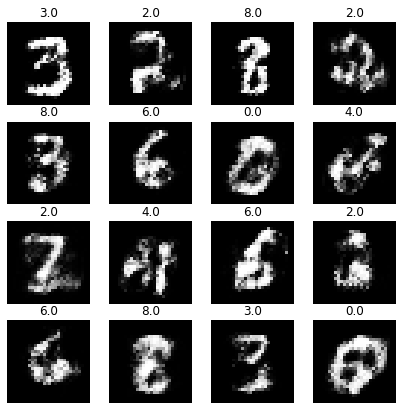

Epoch: 38 | Generator Loss: 1.64672 | Discirminator Loss: 0.99675


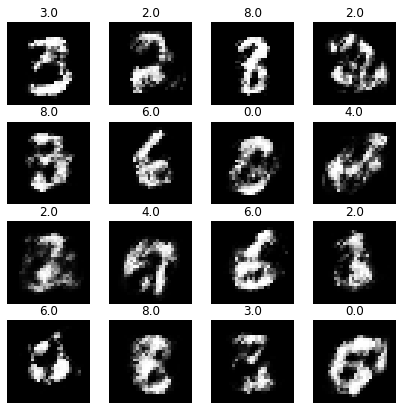

Epoch: 39 | Generator Loss: 1.61141 | Discirminator Loss: 1.01616


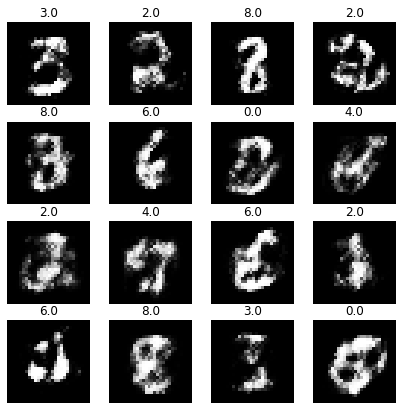

Epoch: 40 | Generator Loss: 1.54465 | Discirminator Loss: 1.01882


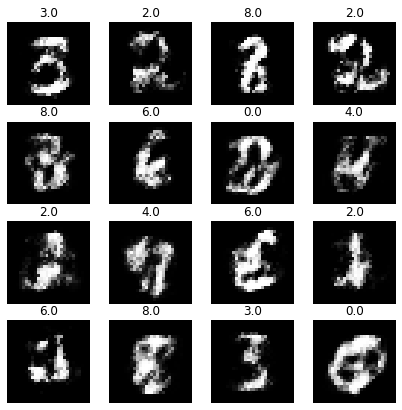

Epoch: 41 | Generator Loss: 1.52436 | Discirminator Loss: 0.98776


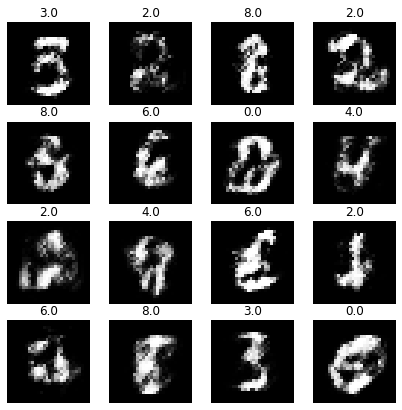

Epoch: 42 | Generator Loss: 1.54999 | Discirminator Loss: 0.96743


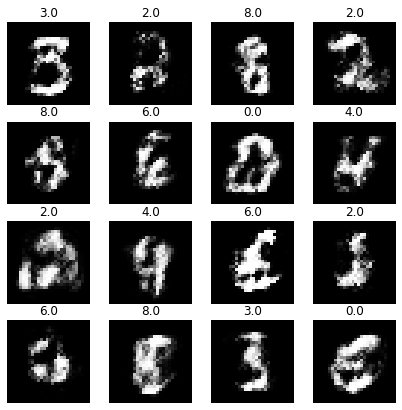

Epoch: 43 | Generator Loss: 1.57725 | Discirminator Loss: 0.96717


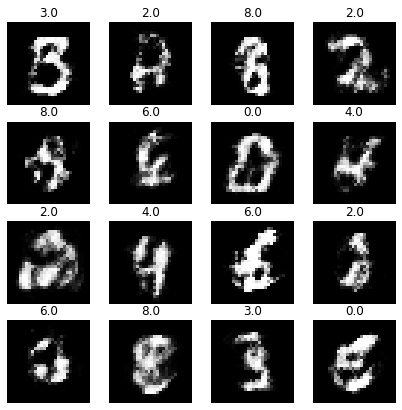

Epoch: 44 | Generator Loss: 1.54719 | Discirminator Loss: 0.98649


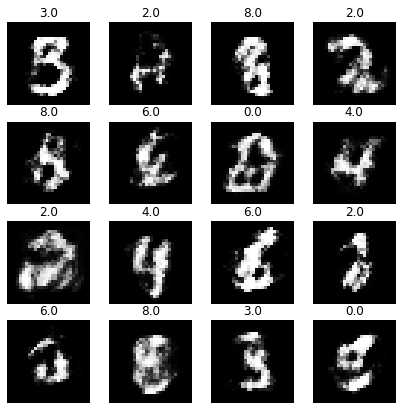

Epoch: 45 | Generator Loss: 1.50595 | Discirminator Loss: 1.01178


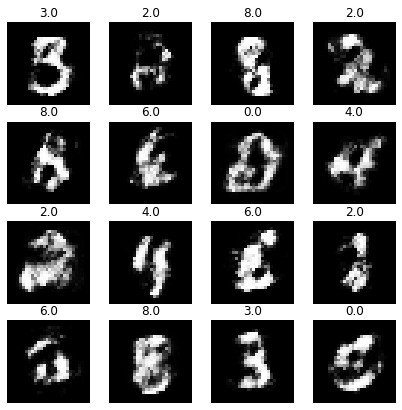

Epoch: 46 | Generator Loss: 1.47427 | Discirminator Loss: 1.00691


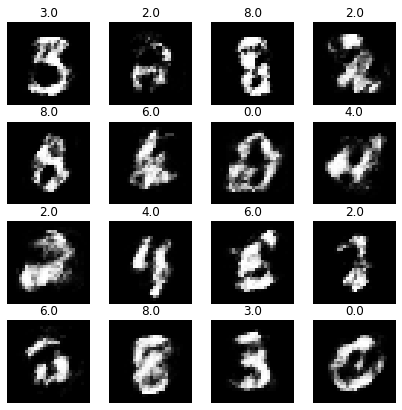

Epoch: 47 | Generator Loss: 1.47483 | Discirminator Loss: 0.99708


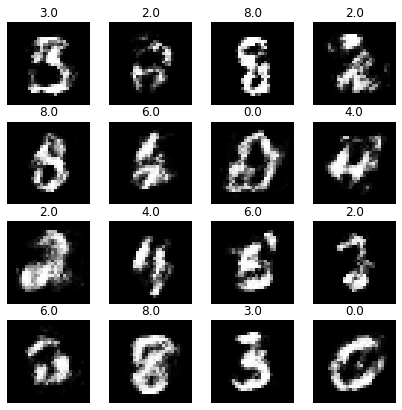

Epoch: 48 | Generator Loss: 1.53565 | Discirminator Loss: 0.96670


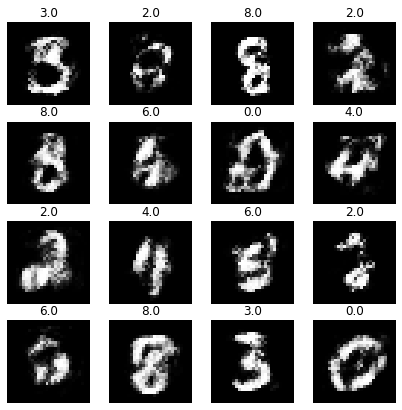

Epoch: 49 | Generator Loss: 1.60691 | Discirminator Loss: 0.96387


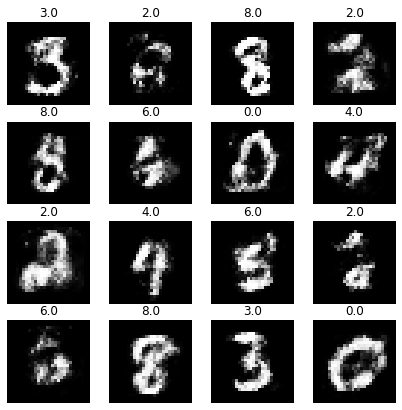

In [9]:
epochs = 50 # a gan usually takes a lot of epochs to work properly
num_batches = 60000//batch_size
learning_rate = 0.001

Glosses = []
Dlosses = []

# we will initialize a fixed pair of noise and labels, and we will see how the generator is improving for these fixed noise and labels 
sample_z = nd.random.normal(0, 1, (16, 100)).as_in_context(ctx)
sample_y = nd.random.randint(0, 10, (16)).as_in_context(ctx).one_hot(10)

t = 0

for epoch in range(epochs):
    gcum_loss = 0.0
    dcum_loss = 0.0
    for features, labels in training_data:
        t += 1
        features = features.as_in_context(ctx)
        labels = labels.as_in_context(ctx).one_hot(10)
        z = nd.random.normal(0, 1, (features.shape[0], 100)).as_in_context(ctx)

        with autograd.record():
            generated = generator(z, labels) # generating false data
            false = discriminator(generated, labels) # discriminator is making the prediction on false data combined with true labels 
            true = discriminator(features, labels)  # discriminator is making the prediction on true data combined with true labels 
            Dloss = dloss(true, false) # calculating loss
        Dloss.backward() # computing gradients
        adam(t, dparams, vs = dvs, sqrs = dsqrs, lr = learning_rate) # optimizing parameters

        with autograd.record():
            generated = generator(z, labels) # generating false data
            false = discriminator(generated, labels) # discriminator is making the prediction on false data combined with true labels
            Gloss = gloss(false) # calculating loss
        Gloss.backward() # computing gradients
        adam(t, gparams, vs = gvs, sqrs = gsqrs, lr = learning_rate) # optimizing parameters
        
        gcum_loss += Gloss
        dcum_loss += Dloss
    
    Gloss = gcum_loss.asscalar()/num_batches
    Dloss = dcum_loss.asscalar()/num_batches
    
    Glosses.append(Gloss)
    Dlosses.append(Dloss)
    
    print(f'Epoch: {epoch} | Generator Loss: {Gloss:.5f} | Discirminator Loss: {Dloss:.5f}')

    # below we are we are generating and plotting the data generated by the generator using our fixed sample noise and labels
    generated = generator(sample_z, sample_y)
    plt.figure(figsize = (7, 7))
    for i, (image) in enumerate(generated[:16]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(image.reshape((28, 28)).asnumpy(), cmap = 'gray')
        plt.title(sample_y[i].argmax(0).asscalar())
        plt.axis('off')
    plt.show()

## Visualizing training performance

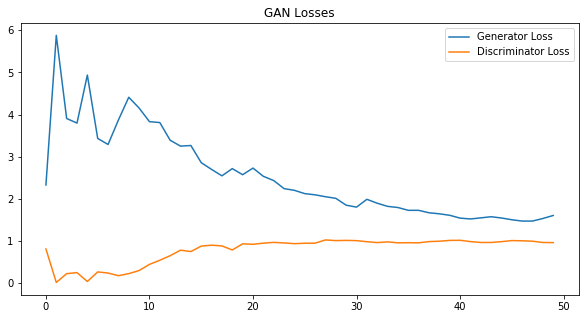

In [10]:
plt.figure(figsize = (10, 5))
plt.plot(Glosses, label = 'Generator Loss')
plt.plot(Dlosses, label = 'Discriminator Loss')
plt.legend()
plt.title('GAN Losses')
plt.show()

## Now lets generate some more data base on our desired output category
First column contain all zeros, second column all ones and so on...

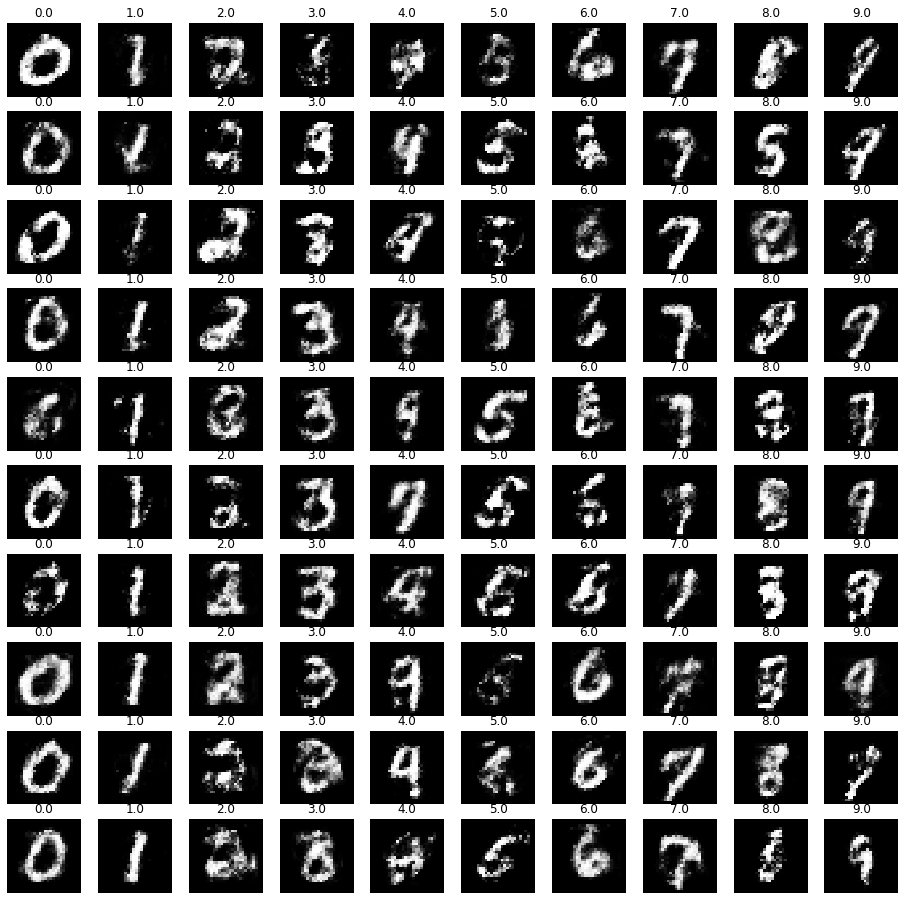

In [20]:
labels = nd.arange(0, 10, 1).tile(10).one_hot(10).as_in_context(ctx)
noise = nd.random.normal(loc = 0, scale = 1, shape = (100, 100)).as_in_context(ctx)

generated = generator(noise, labels)

plt.figure(figsize = (16, 16))
for i, (image, label) in enumerate(zip(generated, labels)):
    plt.subplot(10, 10, i + 1)
    plt.imshow(image.reshape((28, 28)).asnumpy(), 'gray')
    plt.title(label.argmax(0).asscalar())
    plt.axis('off')
plt.show()